In [630]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import itertools

# Get Data 
---

In [631]:
#XVS/USDT_2024_30m & QI/USDT_2024_30m

In [632]:
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

In [633]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [634]:
#XVS/USDT_2024_30m & QI/USDT_2024_30m


crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

cointegrated_pairs = [(crypto_1,
  crypto_2,
  0.731393,
  0.8501886494196308,
  0.22)]

In [635]:
#Params:
window_size = 336
entry_threshold= 4.0
exit_threshold=0.1
stop_loss_threshold= 25

In [636]:
if cointegrated_pairs:
        sym1, sym2, pass_fraction, avg_p_value,correlation = cointegrated_pairs[0]
        print(f"\nTesting strategy on pair: {sym1} and {sym2} (pass_fractioon: {pass_fraction:.4f},average_p_value: {avg_p_value:.4f} correlation: {correlation:.4f})")
        S1 = prices[sym1]
        S2 = prices[sym2]
        
        # Compute the spread series and beta_series 
        spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
        #print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")
        
        # Compute rolling z-score using the provided helper function.
        zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)
        
        # Generate trading signals (positions) based on the spread's z-score
        positions_series,  win_indexs, loss_indexs, price_changes_S1, price_changes_S2 = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)
        
        #Simulate strategy performance
        #pnl, cum_pnl = simulate_strategy(S1, S2, positions, beta)
        
        #pnl, cum_pnl = simulate_true_strategy_rolling(S1, S2, positions_series, beta_series)
        


Testing strategy on pair: BYBIT_STETH/USDT, 30_fd7e3 and BYBIT_ETH/USDT, 30_1dfe3 (pass_fractioon: 0.7314,average_p_value: 0.8502 correlation: 0.2200)
Total trades closed: 67 (Wins=67, Losses=0)
Win rate: 1.00


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 8.000e+00,
        5.000e+00, 2.300e+01, 5.800e+01, 2.860e+02, 1.164e+03, 4.664e+03,
        6.601e+03, 3.194e+03, 6.240e+02, 1.330e+02, 4.200e+01, 1.300e+01,
        1.100e+01, 3.000e+00, 9.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-17.13940549, -16.20311559, -15.26682569, -14.33053579,
        -13.39424589, -12.45795599, -11.52166609, -10.58537619,
         -9.64908629,  -8.71279639,  -7.77650649,  -6.84021659,
         -5.90392669,  -4.96763679,  -4.03134689,  -3.09505699,
         -2.15876709,  -1.22247719,  -0.28618729,   0.65010261,
          1.58639251,   2.52268241,   3.45897231,   4.39

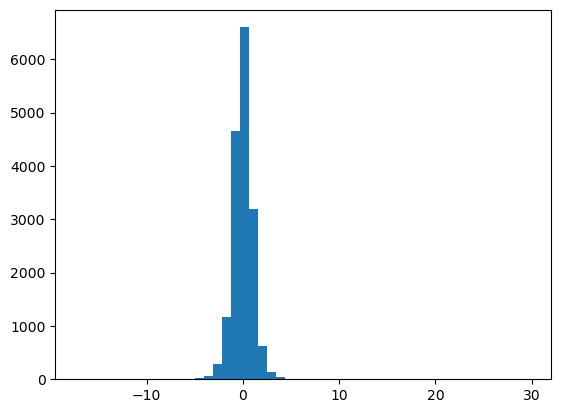

In [637]:
plt.hist(zscore_series, bins=50)

In [638]:
#Compute normalised difference between the two prices
normalised_abs_diff = np.abs((S1 - S2) / (S1 + S2))

#Compute the average normalised difference
np.mean(normalised_abs_diff)

0.0003968226419110906

In [639]:
#SETH and ETH Distance: 0.0003968226419110906

s_eth_distance = 0.0003968226419110906
w_bitcoin_distance = 0.0006442955592394416

percentage = s_eth_distance/w_bitcoin_distance * 100
percentage


61.59015629092954

In [640]:
sym1

'BYBIT_STETH/USDT, 30_fd7e3'

In [641]:
price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

len(price_changes_S2_non_zero)

67

In [642]:
S1

timestamp
2024-01-01 16:30:00    2312.58
2024-01-01 17:00:00    2313.49
2024-01-01 17:30:00    2311.86
2024-01-01 18:00:00    2329.05
2024-01-01 18:30:00    2325.79
                        ...   
2024-12-31 21:30:00    3351.29
2024-12-31 22:00:00    3333.82
2024-12-31 22:30:00    3337.37
2024-12-31 23:00:00    3343.34
2024-12-31 23:30:00    3337.72
Name: BYBIT_STETH/USDT, 30_fd7e3, Length: 17535, dtype: float64

In [643]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost

trade_profits, cumulative_profit_series, entry_indices, exit_indices, long_spread_loss_count, short_spread_loss_count, number_of_dual_leg_profits = simulate_strategy_trade_pnl(S1, S2, positions_series, initial_capital, beta_series,tx_cost)

Dual Leg profit: 11.510797464970564, 11.524732415118807
Dual Leg loss: 29.07670061821512, -9.740627937082143
Dual Leg loss: -42.4370214636708, 73.81805368327409
Dual Leg loss: 31.423044577629902, -8.392860719467278
Dual Leg profit: 12.54463525837019, 12.790377942639777
Dual Leg loss: 99.06807693926311, -66.50403546696133
Dual Leg profit: 6.946937613069573, 8.18625864669047
Dual Leg loss: -0.1615387683226363, 14.529156878321322
Dual Leg loss: 123.68883141242519, -113.82915159083714
Dual Leg loss: -2.255343441079766, 11.823287352206446
Dual Leg profit: 5.600883934488569, 6.872225133031873
Dual Leg loss: 223.2724482227915, -211.88482977769505
Dual Leg loss: -51.213685597278754, 68.01388602036599
Dual Leg loss: -39.502285234130255, 54.644650512229475
Dual Leg loss: 59.592950493855, -45.95339743398991
Dual Leg loss: 71.01222701179786, -45.33725047868834
Dual Leg loss: 44.72418718334056, -27.422518728184375
Dual Leg profit: 60.4175147074709, 7.342345265530383
Dual Leg loss: 78.82049949518344

(array([2., 4., 6., 4., 5., 4., 3., 0., 3., 1., 1., 4., 5., 2., 1., 1., 1.,
        2., 0., 1., 1., 0., 0., 2., 1., 0., 0., 0., 0., 3., 0., 0., 0., 2.,
        1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.86429014, -0.22818132,  0.40792749,  1.0440363 ,  1.68014512,
         2.31625393,  2.95236274,  3.58847156,  4.22458037,  4.86068918,
         5.496798  ,  6.13290681,  6.76901562,  7.40512444,  8.04123325,
         8.67734206,  9.31345087,  9.94955969, 10.5856685 , 11.22177731,
        11.85788613, 12.49399494, 13.13010375, 13.76621257, 14.40232138,
        15.03843019, 15.67453901, 16.31064782, 16.94675663, 17.58286545,
        18.21897426, 18.85508307, 19.49119189, 20.1273007 , 20.76340951,
        21.39951832, 22.03562714, 22.67

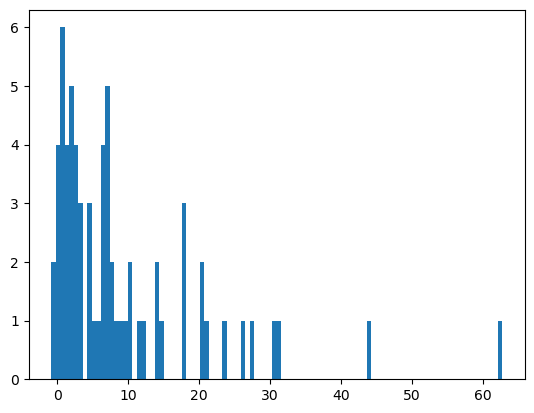

In [644]:
plt.hist(trade_profits, bins=100)

In [645]:
number_of_dual_leg_profits

15

In [646]:
short_spread_loss_count

3

In [647]:
#filter profits by positive values
print(np.mean(trade_profits))

9.190382556187853


In [648]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -0.5762497210437237
Average trade win:  € 9.648193444183082
Number of negative profits(profits that were less than the transaction cost):  3
Number of positive profits (profits that were greater than the transaction cost):  64


Text(0.5, 1.0, 'Returns Distribution for Pair BYBIT_STETH/USDT, 30_fd7e3 and BYBIT_ETH/USDT, 30_1dfe3')

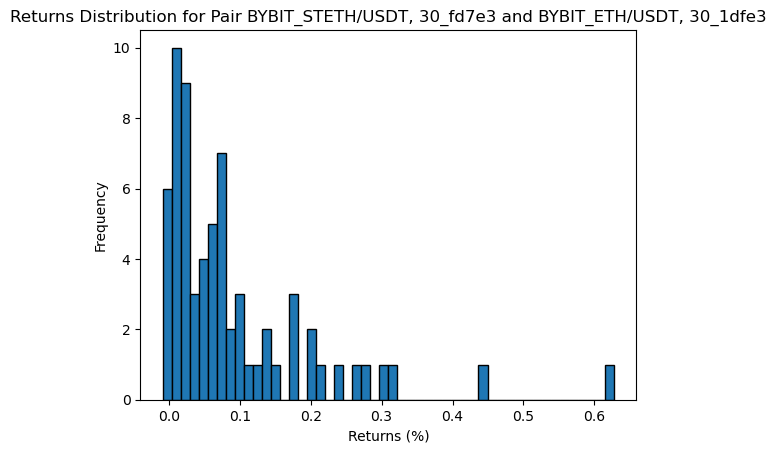

In [649]:
#Calculate returns based on the trade profits
trade_profits = np.array(trade_profits)
returns = trade_profits/initial_capital * 100

#Plot the returns
plt.hist(returns, bins=50, edgecolor='black')
plt.xlabel('Returns (%)')   
plt.ylabel('Frequency')
plt.title(f'Returns Distribution for Pair {sym1} and {sym2}') 

In [650]:
#Calculate percentage price changes for each asset
price_changes_S1 = np.array(price_changes_S1)

In [651]:
# daily_pnl_series, cum_pnl_series, cum_pnl_pct_series, shares_S1_list, shares_S2_list = simulate_strategy_pnl(S1, S2, positions_series, beta_series=beta_series, initial_capital=1_000)

# print(f"Total PnL: {cum_pnl_series[-1]:.2f} EUR")
# print(f"Total PnL (%): {cum_pnl_pct_series[-1]:.2f}%")


In [652]:
#Obtain non-zero price changes
price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

#Convert price changes to percentage
price_changes_S1_non_zero_percent = [(x*100) for x in price_changes_S1_non_zero]
price_changes_S2_non_zero_percent = [(x*100) for x in price_changes_S2_non_zero]

#Print average price changes
print(f"Average price change S1: {np.mean(price_changes_S1_non_zero_percent)} %", f"Average price change S1: {np.mean(price_changes_S2_non_zero_percent)} %")
print(f"Number of trades: {len(price_changes_S1_non_zero)}")

Average price change S1: 0.47667558323670806 % Average price change S1: -0.19294509795704443 %
Number of trades: 67


Percentage return: 6.16 %


/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_97363/54204168.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_return = cumulative_profit_series[-1]/initial_capital * 100


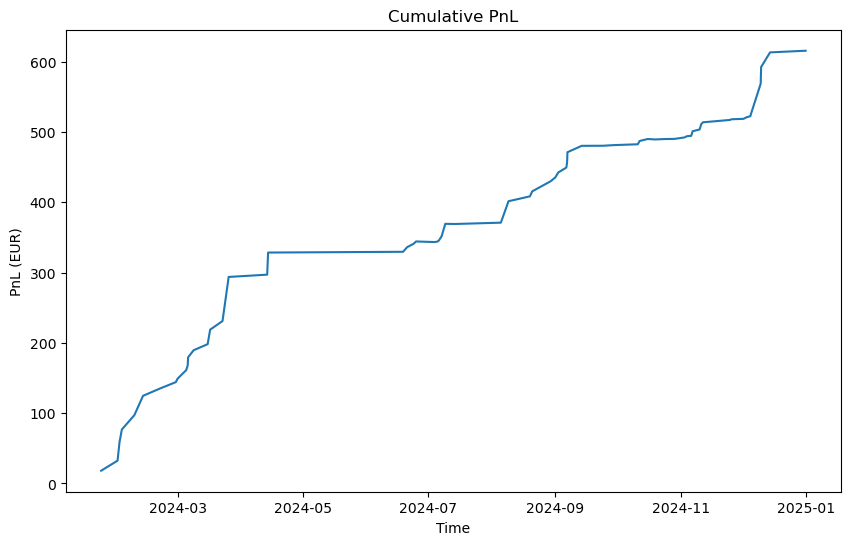

In [653]:
percentage_return = cumulative_profit_series[-1]/initial_capital * 100
print(f"Percentage return: {percentage_return:.2f} %")


#PROFIT SHOULD BE 0.15 EUR

plt.figure(figsize=(10,6))
plt.plot(cumulative_profit_series)
plt.title('Cumulative PnL')
plt.xlabel('Time')
plt.ylabel('PnL (EUR)')
plt.show()

In [654]:
cumulative_profit_series[-1]

/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_97363/4263001124.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_profit_series[-1]


615.7556312645863

Long Entries In Window: 36, Short Entries In Window: 31
Wins In Window: 67, Losses In Window: 0


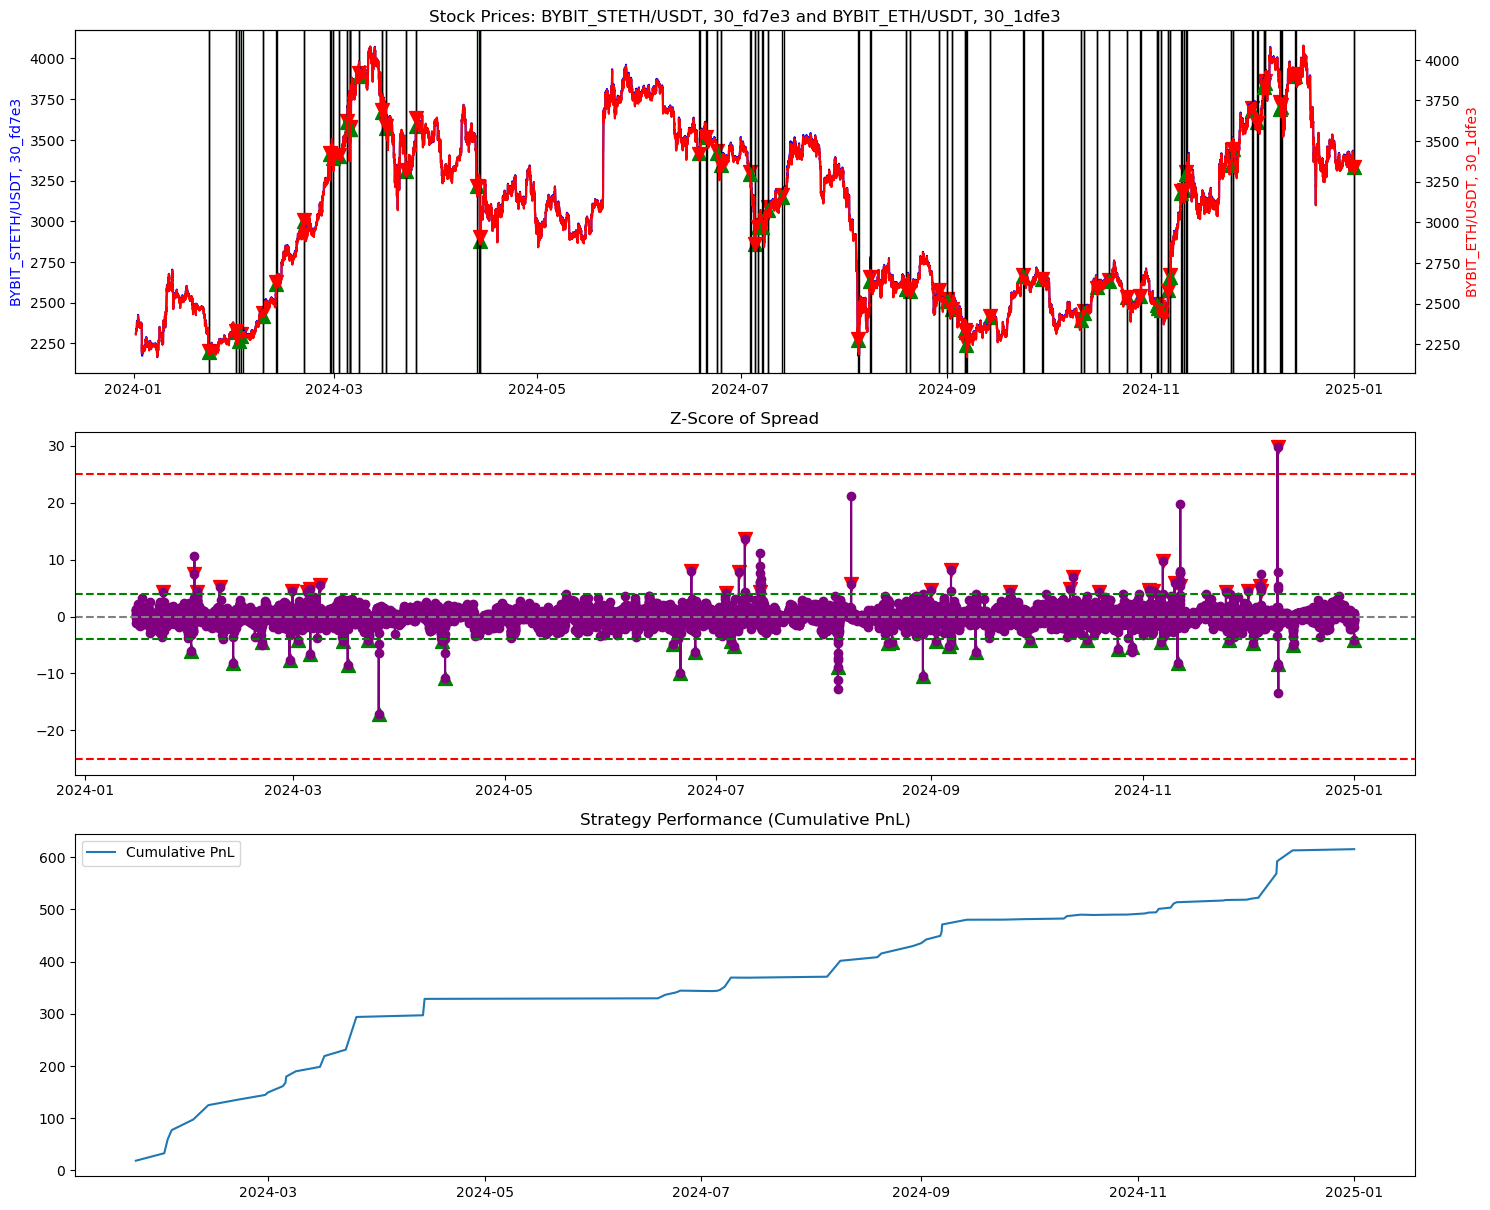

In [655]:
#Plot trading simulation
# window_start = '2023-10-03 00:00:00'
# window_end = '2023-10-03 10:00:00'


# window_start = '2024-01-22 10:00:00'
# window_end = '2024-01-22 22:00:00'

window_start = None
window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES


plot_trading_simulation(S1, S2, sym1,sym2,zscore_series, positions_series,entry_threshold,stop_loss_threshold,
                        cumulative_profit_series,win_indexs=win_indexs,loss_indexs=loss_indexs,
                        window_start=window_start, window_end=window_end)



In [656]:
# First_trade_open_index = entry_indices[0]
# First_trade_close_index = exit_indices[0]

# #Get prices at the start and end of the first trade
# S1_price_start = S1[First_trade_open_index]
# S2_price_start = S2[First_trade_open_index]

# S1_price_end = S1[First_trade_close_index]
# S2_price_end = S2[First_trade_close_index]

# #Get the price changes
# S1_price_change = S1_price_end - S1_price_start
# S2_price_change = S2_price_end - S2_price_start

# #Get percentage price changes
# S1_price_change_percent = S1_price_change/S1_price_start * 100
# S2_price_change_percent = S2_price_change/S2_price_start * 100

# #Print results

# print(f"First trade open index: {First_trade_open_index}")
# print(f"First trade close index: {First_trade_close_index}")

# print(f"S1 price start: {S1_price_start}")
# print(f"S1 price end: {S1_price_end}")

# print(f"S2 price start: {S2_price_start}")
# print(f"S2 price end: {S2_price_end}")

# # #print percentage price changes
# # print(f"S1 price change: {S1_price_change}")
# # print(f"S2 price change: {S2_price_change}")

# print(f"S1 price change percent: {S1_price_change_percent}%")
# print(f"S2 price change percent: {S2_price_change_percent}%")

In [657]:


#Get prices at the start and end of the first trade
S1_price_start = S1[entry_indices]
S2_price_start = S2[entry_indices]

S1_price_end = S1.loc[exit_indices]
S2_price_end = S2.loc[exit_indices]


#Calculate the price changes by converting the series to numpy arrays
S1_price_start = S1_price_start.to_numpy()
S2_price_start = S2_price_start.to_numpy()

S1_price_end = S1_price_end.to_numpy()
S2_price_end = S2_price_end.to_numpy()

print("BEFORE ALIGNMENT")

#Make sure the arrays have the same shape
print(S1_price_start.shape)
print(S2_price_start.shape)


print(S1_price_end.shape)
print(S2_price_end.shape)


if S1_price_start.shape > S1_price_end.shape:
    S1_price_start = S1_price_start[:len(S1_price_end)]

if S2_price_start.shape > S2_price_end.shape:
    S2_price_start = S2_price_start[:len(S2_price_end)]
 
print("AFTER ALIGNMENT")

#Make sure the arrays have the same shape
print(S1_price_start.shape)
print(S2_price_start.shape)

print(S1_price_end.shape)
print(S2_price_end.shape)

#Get the price changes
S1_price_change = S1_price_end - S1_price_start
S2_price_change = S2_price_end - S2_price_start

#Get percentage price changes
S1_price_change_percent = S1_price_change/S1_price_start * 100
S2_price_change_percent = S2_price_change/S2_price_start * 100

#Get absolute percentage price changes
S1_price_change_percent_abs = np.abs(S1_price_change_percent)
S2_price_change_percent_abs = np.abs(S2_price_change_percent)



# #Get the price changes
# S1_price_change = S1_price_end - S1_price_start
# S2_price_change = S2_price_end - S2_price_start


BEFORE ALIGNMENT
(67,)
(67,)
(67,)
(67,)
AFTER ALIGNMENT
(67,)
(67,)
(67,)
(67,)


In [658]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------

print(f"Average absolute S1 price change percent: {np.mean(S1_price_change_percent_abs):.2f}%")
print(f"Average absolute S2 price change percent: {np.mean(S2_price_change_percent_abs):.2f}%")

print(f"Average of average absolute price changes: {(np.mean(S1_price_change_percent_abs) + np.mean(S2_price_change_percent_abs))/2:.2f}%")


Average absolute S1 price change percent: 0.81%
Average absolute S2 price change percent: 0.75%
Average of average absolute price changes: 0.78%
